**Material source:**

https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system


# *Rebuilding* the Netflix Recommender System

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.



In this kernel we'll be building a baseline Movie Recommendation System using TMDB 5000 Movie Dataset. For novices like me this kernel will pretty much serve as a foundation in recommendation systems and will provide you with something to start with.

In [2]:
import pandas as pd
import numpy as np

## Types of Recommendation Systems

1. **Demographic Filtering** - They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

2. **Content Based Filtering** - They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

3. **Collaborative Filtering** - This system matches persons with similar interests and provides recommendations based on this matching. Collaborative filters do not require item metadata like its content-based counterparts.

In [118]:
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

---

The first dataset contains the following features:

- movie_id -  A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:

- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.

In [119]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [66]:
df1.columns = ['id', 'title2', 'cast', 'crew']
df = df2.merge(df1, on='id', how='left')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

## Demographic Filtering

Before getting started, we need a **metric** to score or rate a movie. We can use these scores for sorting and recommending the best rated movie to the users.

---
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So we can use the weighted rating (wr) of IMDB given by:

$$ Weighted \ Rating (WR) = \left(\frac{v}{v+m}\cdot R \right) + \left(\frac{m}{v+m} \cdot C\right)$$

where:
- v is the number of votes for the movie;
- m is the minimum votes required to be listed in the chart;
- R is the average rating of the movie; And
- C is the mean vote across the whole report

We already have v (vote count) and R (vote_average) and C can be calculated as

In [68]:
C = df['vote_average'].mean()
C

np.float64(6.092171559442016)

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [69]:
m = df['vote_count'].quantile(0.90)
m

np.float64(1838.4000000000015)

Now, we can filter out the movies that qualify for the chart.

In [70]:
# filter movies where vote_count is >= m
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(481, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, `weighted_rating()` and define a new feature `score`, of which we'll calculate the value by applying this function to our DataFrame of qualified movies.

In [71]:
def weighted_rating(x, m=m, C=C):
  v = x['vote_count']
  R = x['vote_average']
  return (v/(v+m) * R) + (m/(m+v) * C)

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Finally, let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [72]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


## Content-based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

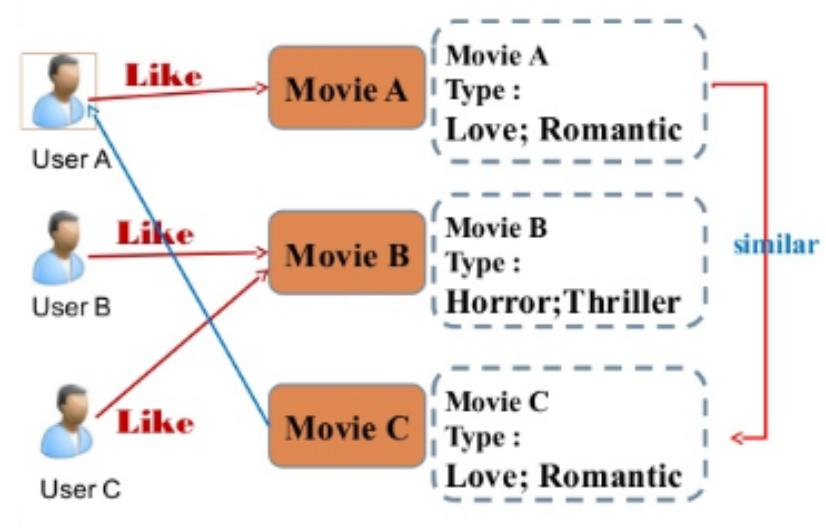

### Plot description-based Recommender

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset. Let's take a look at the data.

In [73]:
df['overview'].head(5)

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."


For any of you who has done even a bit of text processing before knows we need to convert the word vector of each overview. Now we'll compute **Term Frequency-Inverse Document Frequency (TF-IDF)** vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as (term instances/total instances). Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to TF * IDF

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it?

In [74]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [75]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['overview'] = df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the `linear_kernel` to calculate the cosine similarity between two movies.

In [76]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

**Our Objective**: define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [77]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies.
- Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
Return the titles corresponding to the indices of the top elements.

In [111]:
def get_recommendations(title, sim_matrix=cosine_sim, cols=['title']):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(sim_matrix[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]  # start at 1 since the first movie would always be the itself

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top 10 most similar movies
    return df.iloc[movie_indices][cols]

In [79]:
get_recommendations('The Dark Knight Rises')

,title
65,The Dark Knight
299,Batman Forever
428,Batman Returns
1359,Batman
3854,"Batman: The Dark Knight Returns, Part 2"
119,Batman Begins
2507,Slow Burn
9,Batman v Superman: Dawn of Justice
1181,JFK
210,Batman & Robin


While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

### Credits, Genres, and Keywords-based Recommender

It goes without saying that the quality of our recommender would be increased with the usage of better metadata. That is exactly what we are going to do in this section. We are going to build a recommender based on the following metadata: the 3 top actors, the director, related genres and the movie plot keywords.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of "stringified" lists , we need to convert it into a safe and usable structure

In [80]:
from ast import literal_eval

In [81]:
# Parse the stringified features into their corresponding python objects
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [82]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
      if i['job'] == 'Director':
        return i['name']
    return np.nan

In [83]:
def get_list_top3(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]

        # check if more than 3 elements exist. If yes, return only first 3. If no, return all
        if len(names) > 3:
            names = names[:3]
        return names

    # Return empty list in case of missing/malformed data
    return []

In [84]:
# define new director
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list_top3)


In [85]:
# Print the new features
df[['title', 'cast', 'director', 'keywords', 'genres']].head()

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [89]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", '')) for i in x]
    else:
        # check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [90]:
# apply clean data functions to features
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
  df[feature] = df[feature].apply(clean_data)

We are now in a position to create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [100]:
' '.join(df.iloc[0]['genres'])

'action adventure fantasy'

In [101]:
def create_metadata(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

df['metadata'] = df.apply(create_metadata, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [105]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['metadata'])

In [107]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [115]:
get_recommendations('The Dark Knight Rises', cosine_sim2, cols=['title']+features)

,title,cast,keywords,director,genres
65,The Dark Knight,"[christianbale, heathledger, aaroneckhart]","[dccomics, crimefighter, secretidentity]",christophernolan,"[drama, action, crime]"
119,Batman Begins,"[christianbale, michaelcaine, liamneeson]","[himalaya, martialarts, dccomics]",christophernolan,"[action, crime, drama]"
4638,Amidst the Devil's Wings,[],[],,"[drama, action, crime]"
1196,The Prestige,"[hughjackman, christianbale, michaelcaine]","[competition, secret, obsession]",christophernolan,"[drama, mystery, thriller]"
3073,Romeo Is Bleeding,"[garyoldman, lenaolin, annabellasciorra]","[policeoperation, sexaddiction, police]",petermedak,"[action, crime, drama]"
3326,Black November,"[razaaqadoti, sarahwaynecallies, mickeyrourke]",[],jetaamata,"[drama, action, crime]"
1503,Takers,"[chrisbrown, haydenchristensen, mattdillon]",[heist],johnluessenhop,"[action, crime, drama]"
1986,Faster,"[dwaynejohnson, billybobthornton, maggiegrace]",[],"georgetillman,jr.","[crime, drama, action]"
303,Catwoman,"[halleberry, benjaminbratt, sharonstone]","[whiterussian, sex, dccomics]",pitof,"[action, crime]"
747,Gangster Squad,"[joshbrolin, ryangosling, nicknolte]","[losangeles, gangster]",rubenfleischer,"[crime, drama, action]"


In [116]:
get_recommendations('The Dark Knight Rises', cosine_sim, cols=['title']+features)

,title,cast,keywords,director,genres
65,The Dark Knight,"[christianbale, heathledger, aaroneckhart]","[dccomics, crimefighter, secretidentity]",christophernolan,"[drama, action, crime]"
299,Batman Forever,"[valkilmer, tommyleejones, jimcarrey]","[riddle, dccomics, rose]",joelschumacher,"[action, crime, fantasy]"
428,Batman Returns,"[michaelkeaton, dannydevito, michellepfeiffer]","[holiday, corruption, doublelife]",timburton,"[action, fantasy]"
1359,Batman,"[jacknicholson, michaelkeaton, kimbasinger]","[doublelife, dccomics, dualidentity]",timburton,"[fantasy, action]"
3854,"Batman: The Dark Knight Returns, Part 2","[peterweller, arielwinter, davidselby]","[dccomics, future, joker]",jayoliva,"[action, animation]"
119,Batman Begins,"[christianbale, michaelcaine, liamneeson]","[himalaya, martialarts, dccomics]",christophernolan,"[action, crime, drama]"
2507,Slow Burn,"[rayliotta, llcoolj, mekhiphifer]",[],waynebeach,"[mystery, crime, drama]"
9,Batman v Superman: Dawn of Justice,"[benaffleck, henrycavill, galgadot]","[dccomics, vigilante, superhero]",zacksnyder,"[action, adventure, fantasy]"
1181,JFK,"[kevincostner, tommyleejones, garyoldman]","[assassination, cia, homophobia]",oliverstone,"[drama, thriller, history]"
210,Batman & Robin,"[georgeclooney, chriso'donnell, arnoldschwarze...","[doublelife, dccomics, dualidentity]",joelschumacher,"[action, crime, fantasy]"


We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.